In [240]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [133]:
data = pd.read_csv("Student_Performance3.csv")

In [134]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,-99999.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,99999.0
4,7.0,75.0,No,8.0,5.0,66.0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9508 non-null   float64
 1   Previous Scores                   9510 non-null   float64
 2   Extracurricular Activities        9573 non-null   object 
 3   Sleep Hours                       9527 non-null   float64
 4   Sample Question Papers Practiced  9508 non-null   float64
 5   Performance Index                 9534 non-null   float64
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [136]:
data.shape

(10000, 6)

In [137]:
data.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9508.000000,9510.000000,9573,9527.000000,9508.000000,9534.000000
unique,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,4701,NaN,NaN,NaN
mean,225.713925,130.297371,NaN,174.261572,109.615587,-20.188903
std,17373.136279,17996.810041,NaN,17921.756813,16976.187314,18633.595386
min,-99999.000000,-99999.000000,NaN,-99999.000000,-99999.000000,-99999.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [138]:
data.isnull().sum()

Hours Studied                       492
Previous Scores                     490
Extracurricular Activities          427
Sleep Hours                         473
Sample Question Papers Practiced    492
Performance Index                   466
dtype: int64

In [139]:
data.duplicated().sum()

55

In [140]:
data.drop_duplicates(inplace=True)

In [141]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].apply(lambda x: x if x in ['Yes', 'No'] else np.nan)

In [142]:
data['Extracurricular Activities'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    NaN
9997    Yes
9998    Yes
9999     No
Name: Extracurricular Activities, Length: 9945, dtype: object>

In [201]:
#Renseigner les valeurs manquantes
cat_data = []
num_data = []
for i , c in enumerate(data.dtypes):
    if c == "object":
        cat_data.append(data.iloc[:,i])
    else :
        num_data.append(data.iloc[:,i])
num_data = pd.DataFrame(num_data).transpose()
cat_data = pd.DataFrame(cat_data).transpose()


In [202]:
cat_data.isnull().sum()

Extracurricular Activities    700
dtype: int64

In [203]:
print(cat_data.dropna().shape)
print(cat_data.shape)

(9245, 1)
(9945, 1)


In [204]:
#dans ce cas nous avons moin de 10% alors je preferer de supprimer les valeur manquantes
cat_data.dropna(inplace=True)
cat_data.isnull().sum()

Extracurricular Activities    0
dtype: int64

In [205]:
#pour le cas ou il est plus que 10% on va remplacer les manquantes par des valeurs qui se represent le plus ou par le plus proche
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()


False

In [206]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [124]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4676
Yes    4569
Name: count, dtype: int64

In [207]:
#pour les valeurs numeriques 
print(num_data.dropna().shape)
print(num_data.shape)

(7755, 5)
(9945, 5)


In [208]:
# pour les valeur manquante on vas les remplacers par les valeurs precedents de la meme columns 
num_data.fillna(method='bfill',inplace = True)
num_data.isnull().sum().any()

C:\Users\Adam\AppData\Local\Temp\ipykernel_11112\1803669240.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill',inplace = True)


False

In [209]:
num_data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [152]:
# Label encodeeeer
cat_data.value_counts()

Extracurricular Activities
No                            4676
Yes                           4569
Name: count, dtype: int64

In [210]:
#remplacer les valeurs categoriques par des valeurs numeriques
le = LabelEncoder()
for i in cat_data :
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Extracurricular Activities
0,1
1,0
2,1
3,1
4,0
...,...
9994,1
9995,1
9997,1
9998,1


In [211]:
X=pd.concat([cat_data,num_data],axis=1)
Y=X.iloc[:,-1]
Y

0          91.0
1      -99999.0
2          45.0
3       99999.0
4          66.0
         ...   
9965       70.0
9977       82.0
9988       20.0
9989       27.0
9996       58.0
Name: Performance Index, Length: 9945, dtype: float64

In [162]:
X['Extracurricular Activities'].value_counts()

Extracurricular Activities
0.0    4676
1.0    4569
Name: count, dtype: int64

In [122]:
X['Extracurricular Activities'].value_counts()

Extracurricular Activities
0.0    4676
1.0    4569
Name: count, dtype: int64

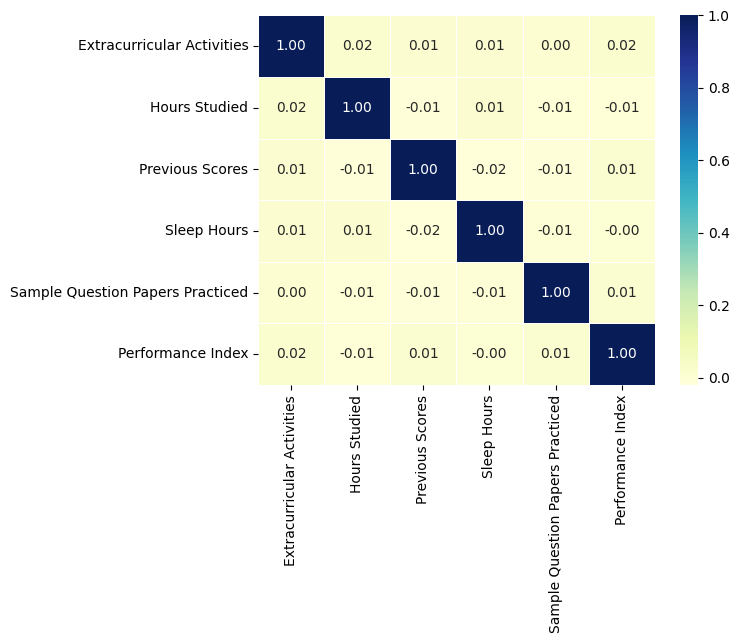

In [224]:
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.show()

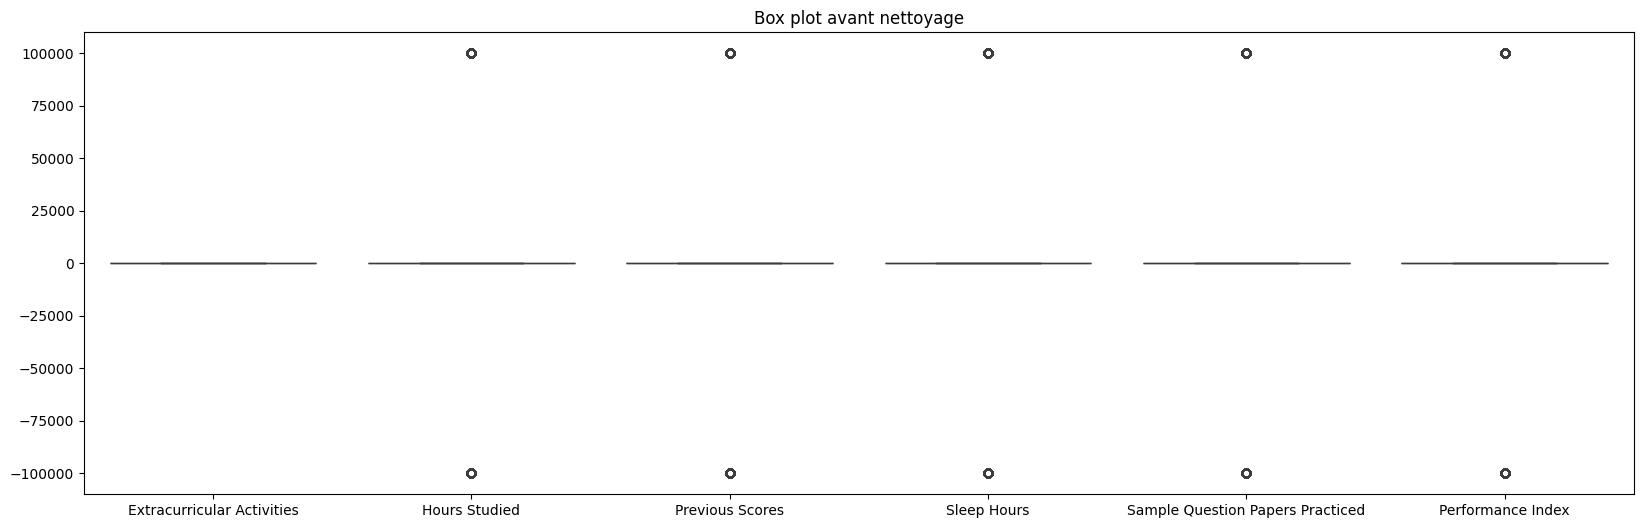

In [225]:
#Box Plot
plt.figure(figsize=(20, 6))
sns.boxplot(data=X)
plt.title("Box plot avant nettoyage")
plt.show()

In [334]:
Q1 = data["Previous Scores"].quantile(0.25)
Q3 = data["Previous Scores"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound , upper_bound)

7.5 131.5


In [218]:
# Z_score
outliers = []
def detecter_outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    for i in data : 
        z_score = (i-mean)/std
        if np.abs(z_score)>2:
            outliers.append(i) 
    return outliers
    

In [219]:
detecter_outliers(data["Previous Scores"])

[-99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 -99999.0,
 -99999.0,
 99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 -99999.0,
 99999.0,
 99999.0,
 99999.0,
 99999.0,
 -99

<Axes: xlabel='Previous Scores'>

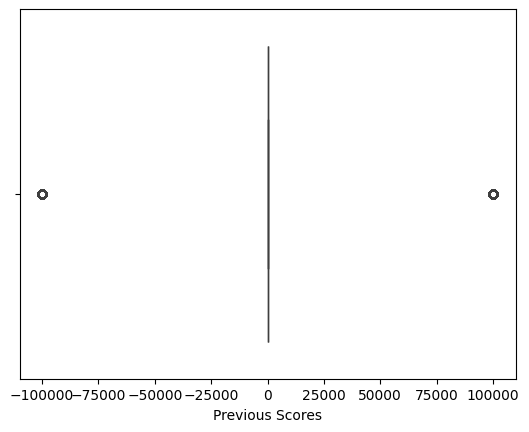

In [52]:
sns.boxplot(x=X["Previous Scores"])

In [145]:
for column in data.select_dtypes(include=[np.number]).columns:
    skewness_per_column = data[column].skew()
    print(f"skewness for {column}: {skewness_per_column}")

skewness for Hours Studied: -0.676250695182695
skewness for Previous Scores: -0.045093770126393075
skewness for Sleep Hours: 0.8327129698881837
skewness for Sample Question Papers Practiced: 0.002746255355965178
skewness for Performance Index: -0.0366637573774976


In [226]:
for column in num_data.columns:
    Q1=num_data[column].quantile(0.25)
    Q3=num_data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    X[column]=num_data[(data[column]>=lower_bound) & (num_data[column]<=upper_bound)][column]
X.isnull().sum()  

Extracurricular Activities            0
Hours Studied                       737
Previous Scores                     756
Sleep Hours                         710
Sample Question Papers Practiced    723
Performance Index                   754
dtype: int64

In [227]:
X.dropna(inplace=True)

In [228]:
X.isnull().sum()

Extracurricular Activities          0
Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [169]:
X['Extracurricular Activities'].value_counts()

Extracurricular Activities
0.0    3063
1.0    3008
Name: count, dtype: int64

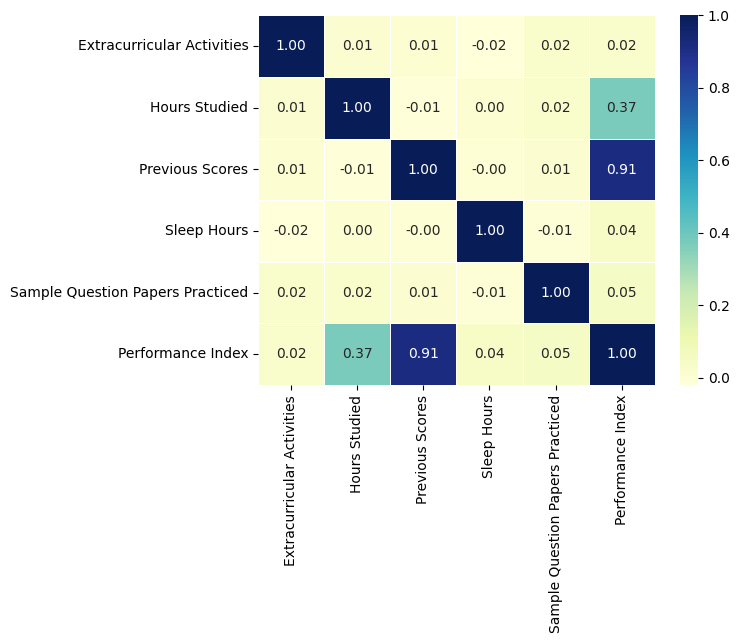

In [229]:
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.show()

sns.pairplot(X)
plt.show()

In [ ]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title("Box plot Apres le nettoyage")
plt.show()

In [230]:
X.describe()

,Extracurricular Activities,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,6071.000000,6071.000000,6071.000000,6071.000000,6071.000000,6071.00000
mean,0.495470,5.008565,69.274255,6.527920,4.578323,55.12255
std,0.500021,2.580677,17.235640,1.706419,2.877124,19.09454
min,0.000000,1.000000,40.000000,4.000000,0.000000,10.00000
25%,0.000000,3.000000,55.000000,5.000000,2.000000,40.00000
50%,0.000000,5.000000,69.000000,7.000000,5.000000,55.00000
75%,1.000000,7.000000,84.000000,8.000000,7.000000,70.00000
max,1.000000,9.000000,99.000000,9.000000,9.000000,100.00000


In [234]:
X.shape

(6071, 6)

In [235]:
X.columns

Index(['Extracurricular Activities', 'Hours Studied', 'Previous Scores',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [173]:
X.drop(columns=(['Sleep Hours','Sample Question Papers Practiced']),inplace=True)

In [236]:
X=X.iloc[:,:-1]
Y=X.iloc[:,-1]


In [237]:
X

,Extracurricular Activities,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,1.0,7.0,99.0,9.0,1.0
2,1.0,8.0,51.0,7.0,2.0
4,0.0,7.0,75.0,8.0,5.0
5,0.0,3.0,78.0,9.0,6.0
6,1.0,7.0,73.0,5.0,6.0
...,...,...,...,...,...
9987,0.0,9.0,74.0,4.0,6.0
9990,0.0,9.0,43.0,7.0,4.0
9992,0.0,9.0,52.0,9.0,7.0
9994,1.0,6.0,46.0,8.0,0.0


# la partie de modélisation

In [247]:
from sklearn.model_selection import train_test_split


# Séparer en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [248]:
# Dictionnaire avec plusieurs modèles
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'SVR (Support Vector Regressor)': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'XGB Regressor': XGBRegressor()
}


In [251]:
# Dictionnaires pour stocker les scores
train_scores = {}
test_scores = {}

# Entraînement et évaluation des modèles
for key, val in models.items():
    print(f"Training {key} model")
    mod = val.fit(X_train, y_train)  # Entraîner le modèle sur les données d'entraînement
    y_pred_train = mod.predict(X_train)  # Prédictions sur les données d'entraînement
    y_pred_test = mod.predict(X_test)   # Prédictions sur les données de test
    
    # Calcul des scores R² pour l'entraînement et le test
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Calcul de l'Erreur Absolue Moyenne (MAE) pour le test
    mae = mean_absolute_error(y_test, y_pred_test)
    
    # Stocker les scores dans les dictionnaires
    train_scores[key] = train_r2
    test_scores[key] = test_r2
    
    # Affichage des résultats
    print(f"Train R²: {train_r2}, Test R²: {test_r2}")
    print(f"Mean Absolute Error: {mae}")
    print('*****************************')

Training Linear Regression model
Train R²: 1.0, Test R²: 1.0
Mean Absolute Error: 2.6323739172111194e-15
*****************************
Training Ridge Regression model
Train R²: 0.9999999993854269, Test R²: 0.9999999993811134
Mean Absolute Error: 6.107515681601535e-05
*****************************
Training Lasso Regression model
Train R²: 0.9855399508211692, Test R²: 0.9855389822074511
Mean Absolute Error: 0.2956520708781495
*****************************
Training Decision Tree Regressor model
Train R²: 1.0, Test R²: 1.0
Mean Absolute Error: 0.0
*****************************
Training Random Forest Regressor model
Train R²: 1.0, Test R²: 1.0
Mean Absolute Error: 0.0
*****************************
Training Gradient Boosting Regressor model
Train R²: 0.9999999990978562, Test R²: 0.9999999990970612
Mean Absolute Error: 7.08192516923935e-05
*****************************
Training SVR (Support Vector Regressor) model
Train R²: 0.998556902562251, Test R²: 0.9986089932849419
Mean Absolute Error: 0

In [252]:
print("Train R² Scores: ", train_scores)
print("Test R² Scores: ", test_scores)

Train R² Scores:  {'Linear Regression': 1.0, 'Ridge Regression': 0.9999999993854269, 'Lasso Regression': 0.9855399508211692, 'Decision Tree Regressor': 1.0, 'Random Forest Regressor': 1.0, 'Gradient Boosting Regressor': 0.9999999990978562, 'SVR (Support Vector Regressor)': 0.998556902562251, 'K-Nearest Neighbors Regressor': 0.9879601476380494, 'XGB Regressor': 0.9999999999658619}
Test R² Scores:  {'Linear Regression': 1.0, 'Ridge Regression': 0.9999999993811134, 'Lasso Regression': 0.9855389822074511, 'Decision Tree Regressor': 1.0, 'Random Forest Regressor': 1.0, 'Gradient Boosting Regressor': 0.9999999990970612, 'SVR (Support Vector Regressor)': 0.9986089932849419, 'K-Nearest Neighbors Regressor': 0.9821076329724651, 'XGB Regressor': 0.9999999999650976}
